In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Machine Learning/Supervised Learning/Some Important Topic for Machine Learning/Features Engineering /Outliers find/bhp.csv")
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.shape

(13200, 7)

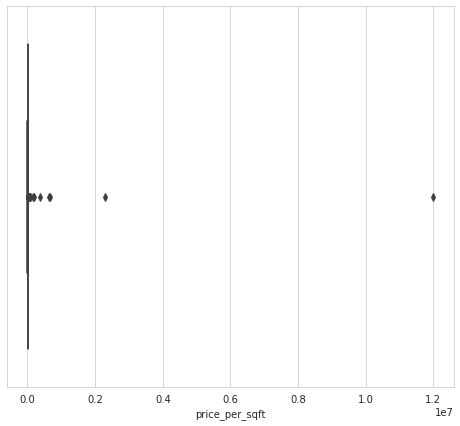

In [4]:
plt.figure(figsize=(8,7))
sns.set_style(style='whitegrid')
sns.boxplot(x='price_per_sqft',data=df)
plt.show()

In [5]:
len(df.location.unique())

241

In [6]:
df.dtypes

location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft      int64
dtype: object

In [7]:
df['size'].dtype

dtype('O')

In [8]:
df['size'].value_counts()

2 BHK         5192
3 BHK         4277
4 Bedroom      816
4 BHK          574
3 Bedroom      541
1 BHK          527
2 Bedroom      325
5 Bedroom      293
6 Bedroom      190
1 Bedroom      100
7 Bedroom       83
8 Bedroom       83
5 BHK           56
9 Bedroom       45
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            7
8 BHK            5
11 Bedroom       2
11 BHK           2
10 BHK           2
27 BHK           1
12 Bedroom       1
43 Bedroom       1
14 BHK           1
13 BHK           1
16 BHK           1
18 Bedroom       1
19 BHK           1
Name: size, dtype: int64

In [9]:
features = df.drop(labels=['location','size','price_per_sqft'],axis=1)
features.head()

,total_sqft,bath,price,bhk
0,1056.0,2.0,39.07,2
1,2600.0,5.0,120.00,4
2,1440.0,2.0,62.00,3
3,1521.0,3.0,95.00,3
4,1200.0,2.0,51.00,2


In [10]:
level = df.iloc[:,-1]
level

0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13195     6689
13196    11111
13197     5258
13198    10407
13199     3090
Name: price_per_sqft, Length: 13200, dtype: int64

In [11]:
lof = LocalOutlierFactor()
outliers = lof.fit_predict(X=features)

In [12]:
outliers

array([1, 1, 1, ..., 1, 1, 1])

In [13]:
np.unique(outliers,return_counts=True)

(array([-1,  1]), array([  571, 12629]))

In [14]:
# select all rows that are not outliers
mask = np.where(outliers==-1)

In [18]:
lof.negative_outlier_factor_

array([-1.17948643, -1.05259742, -1.06026231, ..., -0.99907978,
       -1.02850235, -0.98924698])

In [19]:
value = features[mask]
value

,total_sqft,bath,price,bhk
0,1056.0,2.0,39.07,2
1,2600.0,5.0,120.00,4
2,1440.0,2.0,62.00,3
3,1521.0,3.0,95.00,3
4,1200.0,2.0,51.00,2
...,...,...,...,...
13195,3453.0,4.0,231.00,5
13196,3600.0,5.0,400.00,4
13197,1141.0,2.0,60.00,2
13198,4689.0,4.0,488.00,4


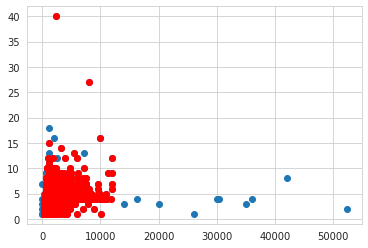

In [27]:
plt.scatter(features.iloc[:,0], features.iloc[:,1])
plt.scatter(value.iloc[:,0],value.iloc[:,1], color='r')
plt.show()

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13195    3453.0
13196    3600.0
13197    1141.0
13198    4689.0
13199     550.0
Name: total_sqft, Length: 13200, dtype: float64